## M161 first question notebook
    - created venv python environment
    - shloud create requirements for resusability
    - data .csv files to large to upload to github will resolve thaht later
## data cleaning 
 1.  check types 
 2. check for null values
 3. check for dublicates

In [1]:
import pandas as pd
file_path = 'bigdata2025classification/train.csv'

def load_and_process_data(file_path):
    # Load data from a CSV file
    dataTrain = pd.read_csv(file_path)

    print("Data loaded successfully.")
    print("First 5 rows of the dataset:")
    print(dataTrain.head())

    print("\nData summary:")
    print(dataTrain.info())

    # Check for missing values in the dataframe
    print("\nMissing values in each column:")
    print(dataTrain.isnull().sum())
    
    return dataTrain

dataTrain = load_and_process_data(file_path)

# check column data types
def check_column_types(dataTrain):
    print("\nColumn data types:")
    print(dataTrain.dtypes)

check_column_types(dataTrain)





Data loaded successfully.
First 5 rows of the dataset:
       Id                                              Title  \
0  227464  Netflix is coming to cable boxes, and Amazon i...   
1  244074  Pharrell, Iranian President React to Tehran 'H...   
2   60707                    Wildlife service seeks comments   
3   27883  Facebook teams up with Storyful to launch 'FB ...   
4  169596           Caesars plans US$880 mln New York casino   

                                             Content          Label  
0   if you subscribe to one of three rinky-dink (...  Entertainment  
1   pharrell, iranian president react to tehran '...  Entertainment  
2   the u.s. fish and wildlife service has reopen...     Technology  
3   the very nature of social media means it is o...     Technology  
4   caesars plans us$880 mln new york casino jul ...       Business  

Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111795 entries, 0 to 111794
Data columns (total 4 columns):
 #   Column   N

In [2]:
# Check for duplicate rows in the dataframe
def check_duplicates(dataTrain):
    duplicate_count = dataTrain.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicate_count}")
    return duplicate_count

check_duplicates(dataTrain)

# Check for duplicates based only on 'Title' column
def check_title_duplicates(dataTrain):
    if 'Title' in dataTrain.columns:
        dup_count = dataTrain.duplicated(subset=['Title']).sum()
        print(f"\nNumber of duplicate rows based on Title: {dup_count}")
        return dup_count
    else:
        print("'Title' column not found in the dataframe.")
        return None

check_title_duplicates(dataTrain)

# Check for duplicates based only on 'Content' column
def check_content_duplicates(dataTrain):
    if 'Content' in dataTrain.columns:
        dup_count = dataTrain.duplicated(subset=['Content']).sum()
        print(f"\nNumber of duplicate rows based on Content: {dup_count}")
        return dup_count
    else:
        print("'Content' column not found in the dataframe.")
        return None

check_content_duplicates(dataTrain)
# Check for duplicates based on 'Title' and 'Content' columns
def check_title_content_duplicates(dataTrain):
    if 'Title' in dataTrain.columns and 'Content' in dataTrain.columns:
        dup_count = dataTrain.duplicated(subset=['Title', 'Content']).sum()
        print(f"\nNumber of duplicate rows based on Title and Content: {dup_count}")
        return dup_count
    else:
        print("'Title' and/or 'Content' columns not found in the dataframe.")
        return None

check_title_content_duplicates(dataTrain)


Number of duplicate rows: 0

Number of duplicate rows based on Title: 1161

Number of duplicate rows based on Content: 1811

Number of duplicate rows based on Title and Content: 575


np.int64(575)

In [3]:
# Remove duplicates based on 'Title' and 'Content' columns, keeping the first occurrence
dataTrain = dataTrain.drop_duplicates(subset=['Title', 'Content'], keep='first')
print("\nDuplicates based on Title and Content removed. Data shape:", dataTrain.shape)


# Reset the index after removing duplicates
dataTrain = dataTrain.reset_index(drop=True)
print("\nIndex reset. Data shape:", dataTrain.shape)
dataTrain.info()


Duplicates based on Title and Content removed. Data shape: (111220, 4)

Index reset. Data shape: (111220, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111220 entries, 0 to 111219
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Id       111220 non-null  int64 
 1   Title    111220 non-null  object
 2   Content  111220 non-null  object
 3   Label    111220 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.4+ MB


In [8]:
import re
import nltk
import contractions
from nltk.corpus import stopwords

# Download stopwords if not already present
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Expand contractions
    text = contractions.fix(text)
    # Convert to lowercase
    text = text.lower()
    # Remove special characters (keep only letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

for col in ['Title', 'Content']:
    dataTrain[col] = dataTrain[col].astype(str).apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\odys_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
print(dataTrain.head())

       Id                                              Title  \
0  227464  netflix coming cable boxes amazon grocery over...   
1  244074  pharrell iranian president react tehran happy ...   
2   60707                    wildlife service seeks comments   
3   27883         facebook teams storyful launch fb newswire   
4  169596               caesars plans us mln new york casino   

                                             Content          Label  
0  subscribe one three rinkydink comparatively sp...  Entertainment  
1  pharrell iranian president react tehran happy ...  Entertainment  
2  yous fish wildlife service reopened comment pe...     Technology  
3  nature social media means often source real ti...     Technology  
4  caesars plans us mln new york casino jul newsd...       Business  


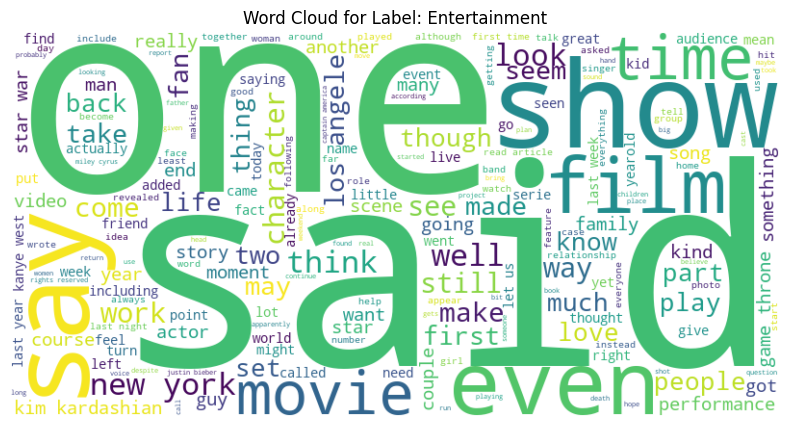

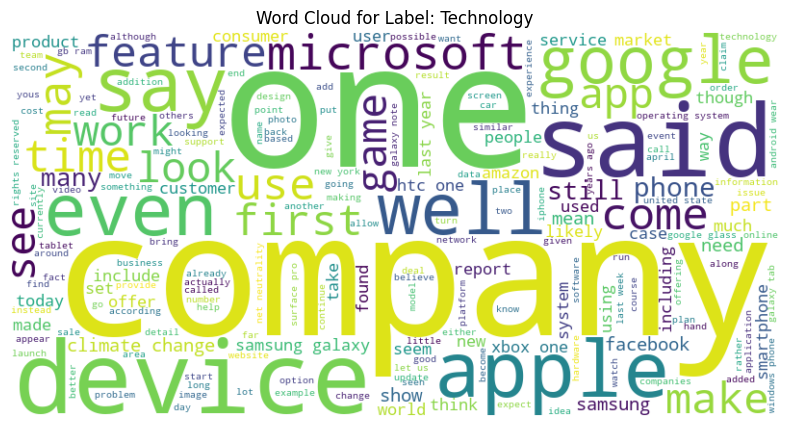

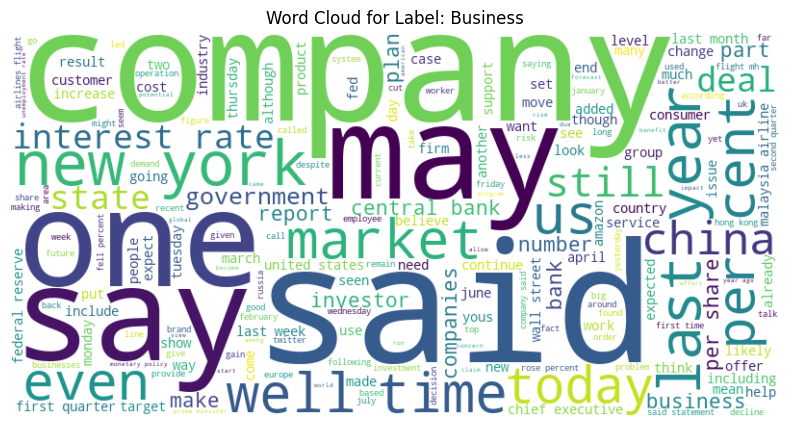

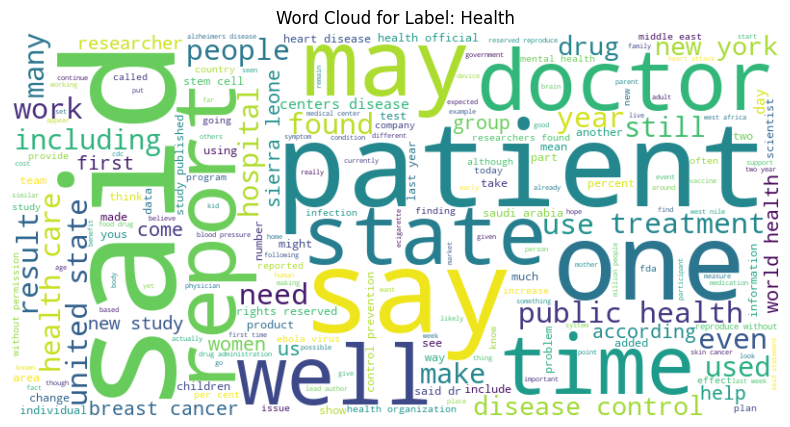

In [ ]:
# Generate word clouds for each unique label using the Content column, ignoring single letter words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

if 'Label' in dataTrain.columns and 'Content' in dataTrain.columns:
    unique_labels = dataTrain['Label'].unique()
    for label in unique_labels:
        text = ' '.join(dataTrain[dataTrain['Label'] == label]['Content'].dropna().astype(str))
        # Remove single letter words
        text = ' '.join([word for word in re.findall(r'\b\w+\b', text) if len(word) > 1])
        # # Write the text variable to a txt file for each label for checking purposes
        # with open(f'text_label_{label}.txt', 'w', encoding='utf-8') as f:
        #     f.write(text)
        if text.strip():
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Word Cloud for Label: {label}')
            plt.show()
        else:
            print(f"No content available for label: {label}")
else:
    print("'Label' and/or 'Content' columns not found in the dataframe.")

## - Could add some word Lemmatization might help, could try later
*******--------------*******
add code here
*******--------------*******

In [6]:
# Dimensionality reduction using Truncated SVD (LSA) for text data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Example: Use the 'Content' column for text features and 'Label' as target
if 'Content' in dataTrain.columns and 'Label' in dataTrain.columns:
    # Convert text to TF-IDF features
    vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
    X_tfidf = vectorizer.fit_transform(dataTrain['Content'].fillna(''))
    
    # Apply Truncated SVD
    svd = TruncatedSVD(n_components=100, random_state=42)
    X_reduced = svd.fit_transform(X_tfidf)
    
    print('Original TF-IDF shape:', X_tfidf.shape)
    print('Reduced shape after Truncated SVD:', X_reduced.shape)
else:
    print("'Content' and/or 'Label' columns not found in the dataframe.")

Original TF-IDF shape: (111220, 10000)
Reduced shape after Truncated SVD: (111220, 100)
